In [27]:
import praw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from IPython import display
import math
from pprint import pprint
from nltk.tokenize import word_tokenize, RegexpTokenizer
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/jupyterlab/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

#### utilizing praw reddit webscraper api

In [4]:
reddit = praw.Reddit(client_id='EL9uWf3ErWRD-A', client_secret='A_nwiG5rRFFww7NIOMbnug9ViLsntg', user_agent='brainstation123')

### reddit webscraping

#### first set of data webscraped from reddit 

In [5]:
#complaints from this weblink
submission = reddit.submission(url='https://www.reddit.com/r/Design/comments/4e93zy/what_is_the_best_stock_photo_website_for_the_best/')

In [6]:
#webscraping the complaints 
a=[]
submission.comments.replace_more(limit=1000)
for comment in submission.comments.list():
    a.append(comment.body)

#### second set of data webscraped from reddit 

In [9]:
#all posts from subbreddit r/shutterstock
subreddit = reddit.subreddit('shutterstock') # Change the subreddit's name here 
sub_ids = []
for submission in subreddit.hot(limit = 1000): # Define the limit here and filter method
    sub_ids.append(submission.id)
    
top_level_comments = []
second_level_comments = []
title = []
selftext = []
for sub_id in sub_ids:
    submission = reddit.submission(id = sub_id)
    title.append(submission.title) # Get submission title
    selftext.append(submission.selftext) # Get submission content
    submission.comments.replace_more(limit = None)
    for top_level_comment in submission.comments:
        top_level_comments.append(top_level_comment.body) # Get top-level comments
        for second_level_comment in top_level_comment.replies:
            second_level_comments.append(second_level_comment.body) # Get second-level comments

In [11]:
top_level_comments

['Oh Shutterstock. How I hate you.',
 'You have to start somewhere, right?',
 'Why is impossible to post question here on this subreddit?',
 '\\[I honestly have no idea bro. like can u even make money outa shutterstock?',
 'thank you foe sharing.',
 "I actually had my first photo that I ever submitted (a selfie) rejected because the model release wasn't correct? Thought I filled it out properly. Was given no explanation of how to resubmit.",
 'Hitler part 2 .',
 'r/StockImageCaption',
 'Cool.! :)',
 "I'm a Shutterstock contributor. I wonder if there is a similar petition for us to sign.",
 "Hey, good luck on your start :) \nNo, you don't need to add any watermark, shutterstock does that automatically once they accept your photo and publish it.",
 'You have to upload your photo as editorial.',
 'I don’t think you can 😞',
 'It might be due to the jpg preview file. Is this the right size?',
 'ngl, your photos kinda suck alba',
 'Take high resolution pictures.\nMake sure you have even ligh

#### third set of webscraped data from reddit 

In [13]:
#obtaining another set of comments on reddit
posts = []
ml_subreddit = reddit.subreddit('Shutterstock')
for post in ml_subreddit.hot():
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

#extracting body to a list 
postToList = list(posts['body'])

In [18]:
postToList

['Let\'s look back at some memorable moments and interesting insights from last year.\n\n**Your top 10 posts:**\n\n* "[My Best and Worst Selling Photos and Images on Shutterstock](https://www.youtube.com/watch?v=MLThFSU5OQ4)" by [u/NikoNomad](https://www.reddit.com/user/NikoNomad)\n* "[Hmm](https://i.redd.it/1mt7osbefu441.jpg)" by [u/TheSexyCheeseGrader](https://www.reddit.com/user/TheSexyCheeseGrader)\n* "[Watermark on images](/r/shutterstock/comments/dpzd6r/watermark_on_images/)" by [u/hawk16v](https://www.reddit.com/user/hawk16v)\n* "[Hey guys I’m just starting off and would love if you can check my images and maybe I can make a couple of bucks just in time for the holdays, thank you so much if you even just glance I know it’s not a lot.](https://www.shutterstock.com/g/Davis+Olive?rid=250198396&utm_medium=email&utm_source=ctrbreferral-link)" by [u/Virdian\\_](https://www.reddit.com/user/Virdian_)\n* "[Shutterstock Is Latest Tech Company to Censor Itself for China](https://theinterce

In [15]:
# joining all webscraped data into one list
everything=postToList+a+top_level_comments

In [28]:
#sentiment analysis 
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results = []

for line in everything:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

pprint(results[:3], width=100)

[{'compound': 0.6818,
  'headline': "Let's look back at some memorable moments and interesting insights from last year.\n"
              '\n'
              '**Your top 10 posts:**\n'
              '\n'
              '* "[My Best and Worst Selling Photos and Images on '
              'Shutterstock](https://www.youtube.com/watch?v=MLThFSU5OQ4)" by '
              '[u/NikoNomad](https://www.reddit.com/user/NikoNomad)\n'
              '* "[Hmm](https://i.redd.it/1mt7osbefu441.jpg)" by '
              '[u/TheSexyCheeseGrader](https://www.reddit.com/user/TheSexyCheeseGrader)\n'
              '* "[Watermark on images](/r/shutterstock/comments/dpzd6r/watermark_on_images/)" by '
              '[u/hawk16v](https://www.reddit.com/user/hawk16v)\n'
              '* "[Hey guys I’m just starting off and would love if you can check my images and '
              'maybe I can make a couple of bucks just in time for the holdays, thank you so much '
              'if you even just glance I know it’s not a

In [29]:
#saving result of the sentiment analysis into a dataframe 
df = pd.DataFrame.from_records(results)
df.head()

,neg,neu,pos,compound,headline
0,0.033,0.886,0.081,0.6818,Let's look back at some memorable moments and ...
1,0.000,0.000,0.000,0.0000,
2,0.137,0.770,0.093,-0.6918,"Hi, I'm new to shutterstock and sotck photogra..."
3,0.000,0.000,0.000,0.0000,
4,0.000,0.889,0.111,0.7278,do people want cutout jpeg stock illustrations...


In [32]:
df['headline'].replace('', np.nan, inplace=True)

In [33]:
df=df.dropna(subset=['headline'])
df.head()

In [36]:
# obtaining sentiments for each line of comment on reddit
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df.head(10)

,neg,neu,pos,compound,headline,label
0,0.033,0.886,0.081,0.6818,Let's look back at some memorable moments and ...,1
2,0.137,0.770,0.093,-0.6918,"Hi, I'm new to shutterstock and sotck photogra...",-1
4,0.000,0.889,0.111,0.7278,do people want cutout jpeg stock illustrations...,1
5,0.101,0.859,0.040,-0.7149,do they convert vector images to png?\n\ni exp...,-1
8,0.000,1.000,0.000,0.0000,[https://www.shutterstock.com/g/Joseph98?rid=2...,0
10,0.000,0.844,0.156,0.8426,I recently started contributing in Shutterstoc...,1
11,0.047,0.953,0.000,-0.2846,every time I have a picture with a brand logo ...,-1
14,0.000,1.000,0.000,0.0000,[http://www.shutterstock.com/g/ThatGermanGuy?r...,0
19,0.253,0.648,0.099,-0.5423,I'm either too stupid or too blind. How can I ...,-1
21,0.040,0.795,0.165,0.9256,"I'm not sure if this belongs here, but all tha...",1


In [39]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].headline)[:5], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].headline)[:5], width=200)

Positive headlines:

["Let's look back at some memorable moments and interesting insights from last year.\n"
 '\n'
 '**Your top 10 posts:**\n'
 '\n'
 '* "[My Best and Worst Selling Photos and Images on Shutterstock](https://www.youtube.com/watch?v=MLThFSU5OQ4)" by [u/NikoNomad](https://www.reddit.com/user/NikoNomad)\n'
 '* "[Hmm](https://i.redd.it/1mt7osbefu441.jpg)" by [u/TheSexyCheeseGrader](https://www.reddit.com/user/TheSexyCheeseGrader)\n'
 '* "[Watermark on images](/r/shutterstock/comments/dpzd6r/watermark_on_images/)" by [u/hawk16v](https://www.reddit.com/user/hawk16v)\n'
 '* "[Hey guys I’m just starting off and would love if you can check my images and maybe I can make a couple of bucks just in time for the holdays, thank you so much if you even just glance I know '
 'it’s not a lot.](https://www.shutterstock.com/g/Davis+Olive?rid=250198396&utm_medium=email&utm_source=ctrbreferral-link)" by [u/Virdian\\_](https://www.reddit.com/user/Virdian_)\n'
 '* "[Shutterstock Is Latest Tec

In [ ]:
#stopwords and tokenizer for the word count
stop_words = stopwords.words('english')
tokenizer = RegexpTokenizer(r'\w+')

In [41]:
#function to tokenize and convert the words to lower character
def process_text(headlines):
    tokens = []
    for line in headlines:
        toks = tokenizer.tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        tokens.extend(toks)
    
    return tokens

In [46]:
#printing out the most frequent words from the positive sentiments
pos_lines = list(df[df.label == 1].headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('shutterstock', 25),
 ('com', 21),
 ('www', 15),
 ('https', 14),
 ('images', 12),
 ('u', 11),
 ('use', 11),
 ('reddit', 10),
 ('user', 10),
 ('photos', 9),
 ('stock', 8),
 ('image', 7),
 ('want', 6),
 ('download', 6),
 ('free', 6),
 ('month', 6),
 ('r', 5),
 ('comments', 5),
 ('time', 5),
 ('illustrations', 5)]

In [47]:
#printing out the most frequent words from the negative sentiments
neg_lines = list(df[df.label == -1].headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('shutterstock', 16),
 ('like', 8),
 ('get', 8),
 ('else', 5),
 ('access', 5),
 ('service', 5),
 ('use', 4),
 ('new', 3),
 ('give', 3),
 ('vector', 3),
 ('stock', 3),
 ('time', 3),
 ('picture', 3),
 ('brand', 3),
 ('size', 3),
 ('year', 3),
 ('billing', 3),
 ('account', 3),
 ('last', 3),
 ('back', 3)]

#### word count plot for positive words

In [65]:
frequency_dist = nltk.FreqDist(pos_tokens)

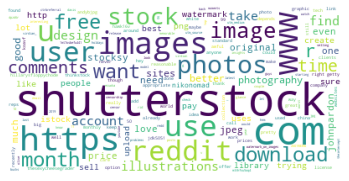

In [66]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white", contour_width=3, contour_color='steelblue').generate_from_frequencies(frequency_dist)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### tokenizing the data and using random forest classifier

In [ ]:
df2 = df[['headline', 'label']]

In [217]:
# store simplified data in X and y
X = df2['headline']
y = df2['label']

In [218]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import load_files

In [136]:
tvec = TfidfVectorizer(stop_words='english', max_features=1000, ngram_range=[1,2])
X_train_tvec = tvec.fit_transform(X_train)
X_test_tvec = tvec.transform(X_test)

In [137]:
indices = np.argsort(tvec.idf_)[::]
features = tvec.get_feature_names()
top_n = 15
top_features = [features[i] for i in indices[:top_n]]
print(top_features)

['shutterstock', 'com', 'stock', 'use', 'shutterstock com', 'photos', 'www', 'don', 'https', 'image', 'good', 'just', 'stocksy', 'need', 'time']


#### utilizing random forest classification

In [141]:
rf = RandomForestClassifier()
rf.fit(X_train_tvec,y_train)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [142]:
rf.score(X_test_tvec, y_test)

0.6904761904761905